<a href="https://colab.research.google.com/github/yash5891/Deep-Learning/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
dataset = MNIST(root='data/', download = True, train=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 36539282.68it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1123082.64it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 9944555.50it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 6654044.28it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


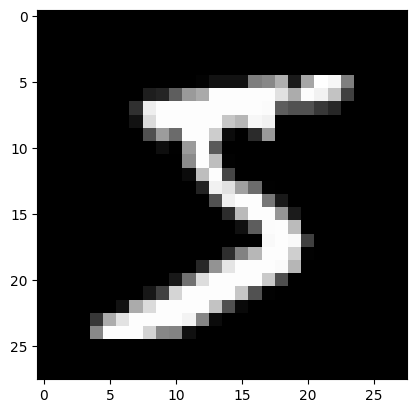

In [7]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


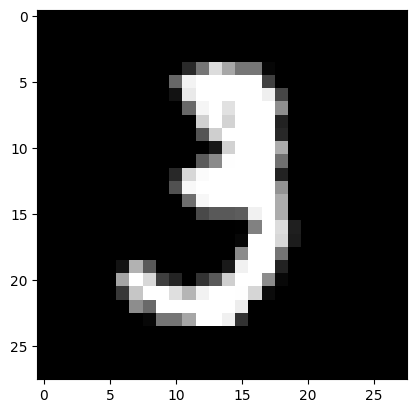

In [8]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [9]:
import torchvision.transforms as transforms

In [10]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/',
                train=True,
                transform=transforms.ToTensor())

In [11]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


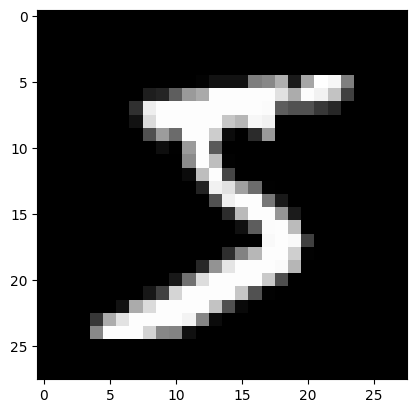

In [15]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0], cmap='gray');

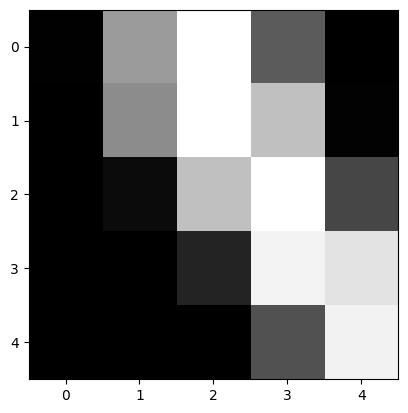

In [16]:
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

In [17]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [19]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)#loading inputs and outputs

In [20]:

import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [21]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0114, -0.0025,  0.0229,  ..., -0.0071, -0.0018,  0.0234],
        [-0.0069,  0.0214, -0.0072,  ...,  0.0204,  0.0193, -0.0254],
        [-0.0198,  0.0145,  0.0231,  ...,  0.0240, -0.0065,  0.0167],
        ...,
        [-0.0166,  0.0039,  0.0057,  ..., -0.0224,  0.0342, -0.0191],
        [-0.0208, -0.0241,  0.0158,  ...,  0.0325,  0.0052,  0.0155],
        [-0.0074, -0.0118,  0.0063,  ...,  0.0146, -0.0135, -0.0343]],
       requires_grad=True)

In [22]:
print(model.bias.shape)
model.bias

Parameter containing:
tensor([-0.0091,  0.0014, -0.0209,  0.0007,  0.0295, -0.0252, -0.0096, -0.0049,
         0.0347, -0.0158], requires_grad=True)

In [31]:
images.shape

torch.Size([128, 784])

In [24]:
for images, labels in train_loader:

    images = images.reshape(-1, 28*28)
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([9, 8, 0, 8, 7, 4, 2, 5, 3, 4, 8, 6, 8, 5, 6, 8, 6, 9, 8, 2, 6, 2, 0, 3,
        3, 2, 8, 9, 0, 8, 0, 5, 9, 4, 7, 6, 8, 1, 3, 1, 7, 3, 8, 1, 0, 9, 6, 7,
        9, 2, 6, 6, 4, 0, 8, 4, 7, 8, 8, 6, 9, 7, 2, 3, 2, 0, 9, 7, 4, 6, 8, 0,
        9, 9, 5, 0, 1, 6, 9, 1, 8, 3, 4, 3, 3, 4, 4, 3, 8, 7, 1, 0, 3, 5, 3, 5,
        0, 9, 1, 7, 1, 7, 4, 1, 6, 2, 3, 3, 1, 3, 7, 6, 4, 5, 1, 8, 4, 0, 3, 1,
        9, 9, 0, 6, 5, 0, 0, 5])
torch.Size([128, 784])
tensor([[ 1.7586e-01,  2.2950e-01, -3.4225e-02,  ..., -2.7176e-01,
         -1.2322e-01, -7.2862e-02],
        [ 2.8640e-01,  2.3011e-02,  2.8363e-01,  ..., -3.7615e-01,
         -2.9802e-01,  1.2713e-01],
        [ 7.7504e-02, -3.9786e-06,  3.5868e-01,  ...,  2.0953e-01,
          5.1590e-01, -1.3811e-01],
        ...,
        [ 2.1112e-01,  3.2745e-01,  2.3057e-01,  ..., -6.1044e-02,
         -1.3351e-01, -3.6225e-01],
        [ 1.3965e-01,  5.1210e-03, -1.5693e-01,  ..., -1.6922e-01,
         -1.4097e-01, -1.9506e-01],
        [ 1.1244

In [28]:
import torch

# Create a 1D tensor (vector)
a = torch.arange(4.)

# Reshape it into a 2x2 matrix
reshaped_a = torch.reshape(a, -1)

print(reshaped_a)
# Output:
# tensor([[0., 1.],
#         [2., 3.]])
a

TypeError: reshape(): argument 'shape' (position 2) must be tuple of ints, not int

In [29]:
import torch

a = torch.arange(12).reshape(4, 3)
print(a)
# Output:
# tensor([[ 0,  1,  2],
#         [ 3,  4,  5],
#         [ 6,  7,  8],
#         [ 9, 10, 11]])
import torch



tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])
tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])


In [32]:
images.reshape(128, 784).shape

torch.Size([128, 784])

In [33]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = torch.sigmoid(self.linear(xb))
        return out

model = MnistModel()

In [34]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0118, -0.0282,  0.0123,  ..., -0.0325, -0.0047,  0.0183],
         [ 0.0085, -0.0330, -0.0119,  ..., -0.0168,  0.0141,  0.0260],
         [ 0.0063, -0.0186, -0.0111,  ...,  0.0091,  0.0090,  0.0154],
         ...,
         [ 0.0244, -0.0017, -0.0241,  ..., -0.0350,  0.0095,  0.0204],
         [-0.0072, -0.0102,  0.0181,  ...,  0.0228,  0.0048, -0.0097],
         [-0.0064, -0.0249,  0.0329,  ...,  0.0068,  0.0065,  0.0074]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0115,  0.0128, -0.0101, -0.0300, -0.0251, -0.0168, -0.0349,  0.0235,
          0.0348,  0.0293], requires_grad=True)]

In [35]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[0.4473, 0.5090, 0.5528, 0.5421, 0.5273, 0.4554, 0.5105, 0.5016, 0.4822,
         0.5170],
        [0.4995, 0.5177, 0.5471, 0.5465, 0.4966, 0.4447, 0.5147, 0.5155, 0.4770,
         0.4805]])


In [36]:
max_probs, preds = torch.max(outputs, dim=1)
print(preds)
print(max_probs)

tensor([2, 2, 9, 2, 3, 9, 2, 9, 2, 2, 9, 2, 9, 2, 2, 9, 1, 9, 2, 9, 1, 8, 1, 6,
        2, 3, 2, 2, 9, 2, 9, 1, 2, 2, 9, 2, 9, 9, 3, 9, 3, 1, 2, 2, 9, 2, 9, 1,
        9, 2, 1, 2, 9, 2, 9, 2, 9, 9, 9, 2, 6, 1, 2, 9, 2, 3, 9, 9, 9, 2, 9, 9,
        9, 2, 1, 9, 4, 9, 2, 9, 9, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 9, 2, 1, 2, 1,
        3, 9, 2, 0, 2, 0, 2, 2, 2, 9, 1, 9, 2, 9, 2, 2, 1, 7, 2, 2, 9, 2, 1, 2,
        9, 9, 9, 2, 9, 2, 4, 9])
tensor([0.5528, 0.5471, 0.5818, 0.5483, 0.5493, 0.5705, 0.5559, 0.5732, 0.5709,
        0.5728, 0.5290, 0.6005, 0.5592, 0.5694, 0.5565, 0.5746, 0.5588, 0.5269,
        0.5503, 0.5405, 0.5522, 0.5287, 0.5899, 0.5583, 0.5848, 0.5367, 0.5769,
        0.6083, 0.5281, 0.6013, 0.5731, 0.5590, 0.5769, 0.5708, 0.5402, 0.5607,
        0.5788, 0.5475, 0.5575, 0.5604, 0.5483, 0.5581, 0.5662, 0.5768, 0.5362,
        0.5649, 0.5884, 0.5789, 0.5341, 0.5845, 0.5559, 0.5542, 0.6007, 0.5444,
        0.5436, 0.5632, 0.5333, 0.5943, 0.5356, 0.6035, 0.5755, 0.5170, 0.5500,
       

In [37]:
labels

tensor([9, 4, 3, 8, 9, 7, 8, 2, 2, 6, 1, 8, 1, 0, 4, 8, 3, 3, 7, 9, 6, 5, 3, 3,
        4, 9, 7, 9, 1, 0, 3, 9, 8, 2, 7, 9, 8, 1, 4, 0, 0, 9, 6, 2, 4, 5, 6, 3,
        2, 2, 6, 2, 8, 2, 4, 8, 0, 1, 1, 8, 8, 3, 7, 9, 6, 7, 2, 1, 0, 6, 2, 1,
        6, 9, 3, 1, 3, 1, 4, 5, 2, 8, 0, 0, 0, 2, 4, 4, 3, 5, 7, 8, 5, 6, 4, 6,
        6, 1, 2, 4, 9, 0, 0, 0, 6, 1, 2, 7, 4, 1, 0, 4, 4, 4, 2, 8, 3, 0, 5, 8,
        1, 0, 0, 9, 1, 6, 8, 1])

In [38]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [39]:
accuracy(outputs, labels)

tensor(0.0938)

In [40]:
import torch.nn.functional as F

In [42]:
loss_fn = F.cross_entropy

In [43]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3123, grad_fn=<NllLossBackward0>)


In [44]:
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

In [45]:
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

In [46]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt, train_dl):
    # correct = 0
    total = 0
    correct = 0
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        epoch_loss = 0
        epoch_acc = 0
        # Train with batches of data
        for xb,yb in train_dl:


            # 1. Generate predictions
            pred = model(xb)

            # 2. Calculate loss
            loss = loss_fn(pred, yb)


            acc = accuracy(pred, yb)

            # 3. Compute gradients
            loss.backward()

            # 4. Update parameters using gradients
            opt.step()

            # 5. Reset the gradients to zero
            opt.zero_grad()

            epoch_loss += loss.item()

        # Print the progress
        if (epoch+1) % 10 == 0:

            print('Epoch [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}'.format(epoch+1, num_epochs, loss.item(), acc))

In [47]:
fit(100, model, loss_fn, opt, train_loader)

Epoch [10/100], Loss: 2.3101, Accuracy: 0.15
Epoch [20/100], Loss: 2.3095, Accuracy: 0.10
Epoch [30/100], Loss: 2.3041, Accuracy: 0.06
Epoch [40/100], Loss: 2.3000, Accuracy: 0.11
Epoch [50/100], Loss: 2.3053, Accuracy: 0.09
Epoch [60/100], Loss: 2.3015, Accuracy: 0.10
Epoch [70/100], Loss: 2.2899, Accuracy: 0.16


KeyboardInterrupt: 

In [48]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

    def evaluate(self, val_loader):
      outputs = [self.validation_step(batch) for batch in val_loader]
      return self.validation_epoch_end(outputs)


model = MnistModel()

In [49]:
history0 = model.evaluate(val_loader)

In [50]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results

    for epoch in range(epochs):

        # Training Phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        # Validation phase
        result = model.evaluate(val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [56]:
history1 = fit(5, 0.00010, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7549, val_acc: 0.8442
Epoch [1], val_loss: 0.7529, val_acc: 0.8443
Epoch [2], val_loss: 0.7509, val_acc: 0.8446
Epoch [3], val_loss: 0.7489, val_acc: 0.8448
Epoch [4], val_loss: 0.7470, val_acc: 0.8451


In [57]:
history2 = fit(5, 0.00010, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7450, val_acc: 0.8455
Epoch [1], val_loss: 0.7431, val_acc: 0.8458
Epoch [2], val_loss: 0.7412, val_acc: 0.8459
Epoch [3], val_loss: 0.7393, val_acc: 0.8459
Epoch [4], val_loss: 0.7375, val_acc: 0.8461


In [58]:
history3 = fit(5, 0.00010, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7356, val_acc: 0.8461
Epoch [1], val_loss: 0.7338, val_acc: 0.8463
Epoch [2], val_loss: 0.7320, val_acc: 0.8466
Epoch [3], val_loss: 0.7302, val_acc: 0.8466
Epoch [4], val_loss: 0.7285, val_acc: 0.8467


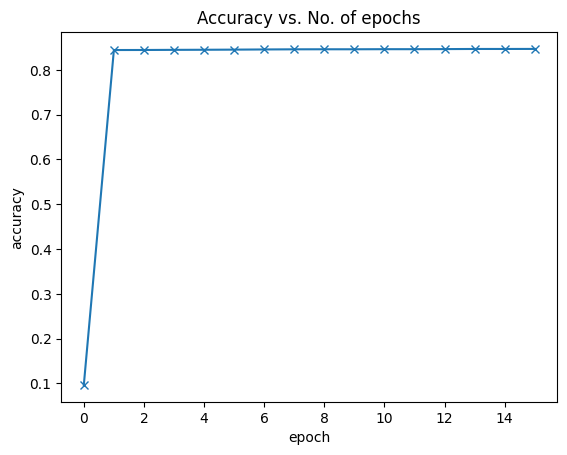

In [59]:
history = [history0] + history1 + history2 + history3
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [60]:
test_dataset = MNIST(root='data/',
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


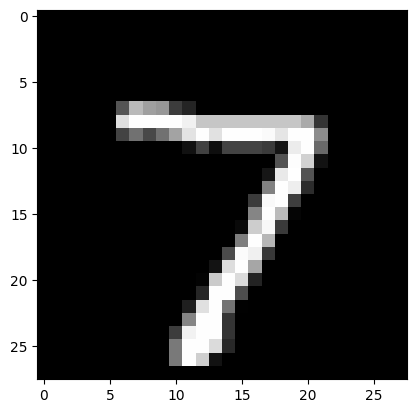

In [61]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [62]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


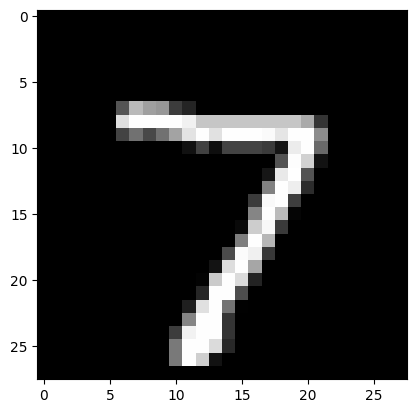

In [63]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


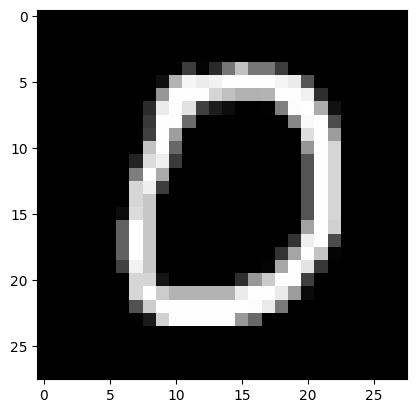

In [64]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 3


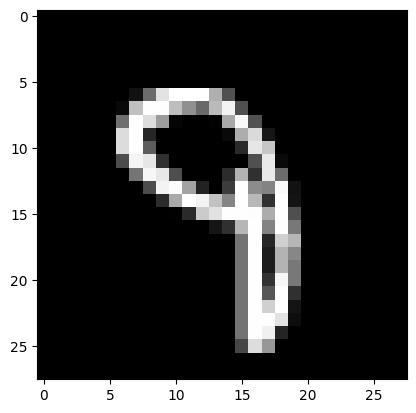

In [65]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [66]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = model.evaluate(test_loader)
result

{'val_loss': 0.6947953104972839, 'val_acc': 0.854687511920929}

In [69]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [70]:
model.state_dict()


OrderedDict([('linear.weight',
              tensor([[ 0.0314,  0.0272, -0.0348,  ..., -0.0289, -0.0143,  0.0294],
                      [-0.0080, -0.0353, -0.0267,  ..., -0.0351, -0.0134,  0.0259],
                      [-0.0297, -0.0242,  0.0321,  ...,  0.0247, -0.0068, -0.0272],
                      ...,
                      [ 0.0150,  0.0193,  0.0234,  ...,  0.0054, -0.0201, -0.0243],
                      [-0.0217, -0.0001,  0.0023,  ...,  0.0268,  0.0250,  0.0160],
                      [-0.0233,  0.0028, -0.0248,  ...,  0.0124, -0.0150, -0.0329]])),
             ('linear.bias',
              tensor([-0.0143,  0.0583, -0.0357, -0.0346,  0.0010,  0.0400,  0.0122,  0.0589,
                      -0.0906,  0.0102]))])

In [71]:
model2 = MnistModel()

In [72]:
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0329,  0.0107,  0.0062,  ..., -0.0309,  0.0053,  0.0107],
                      [-0.0025,  0.0249, -0.0131,  ..., -0.0356, -0.0070, -0.0140],
                      [-0.0045, -0.0026, -0.0274,  ...,  0.0193,  0.0334, -0.0147],
                      ...,
                      [-0.0335,  0.0312, -0.0024,  ...,  0.0083, -0.0323, -0.0095],
                      [-0.0189,  0.0196,  0.0195,  ..., -0.0054,  0.0294,  0.0284],
                      [ 0.0304, -0.0231,  0.0326,  ...,  0.0065, -0.0008, -0.0126]])),
             ('linear.bias',
              tensor([ 0.0179, -0.0331, -0.0093, -0.0023, -0.0160,  0.0263, -0.0061,  0.0336,
                       0.0352, -0.0068]))])

In [73]:
model2.evaluate(test_loader)

{'val_loss': 2.341386318206787, 'val_acc': 0.08515624701976776}

In [74]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0314,  0.0272, -0.0348,  ..., -0.0289, -0.0143,  0.0294],
                      [-0.0080, -0.0353, -0.0267,  ..., -0.0351, -0.0134,  0.0259],
                      [-0.0297, -0.0242,  0.0321,  ...,  0.0247, -0.0068, -0.0272],
                      ...,
                      [ 0.0150,  0.0193,  0.0234,  ...,  0.0054, -0.0201, -0.0243],
                      [-0.0217, -0.0001,  0.0023,  ...,  0.0268,  0.0250,  0.0160],
                      [-0.0233,  0.0028, -0.0248,  ...,  0.0124, -0.0150, -0.0329]])),
             ('linear.bias',
              tensor([-0.0143,  0.0583, -0.0357, -0.0346,  0.0010,  0.0400,  0.0122,  0.0589,
                      -0.0906,  0.0102]))])

In [75]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = model2.evaluate(test_loader)
result

{'val_loss': 0.6947953104972839, 'val_acc': 0.854687511920929}